In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from google.colab import files

from sklearn.metrics import silhouette_score

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# ***Cargar DataSet***

In [2]:
dataSet = pd.read_csv("https://raw.githubusercontent.com/JohamSMC/electiva4/master/dataSets/dataSets-OliveOil/dataSet-OliveOli-Original.csv", sep=";")
print("Fila y Columnas DataSet = ",dataSet.shape)
dataSet

Fila y Columnas DataSet =  (602, 55)


,id,FECHA_NACIMIENTO,Edad,GENERO,ESTADO_CIVIL,NUMERO_HIJOS,PROFESION,NIVEL_ESTUDIO,OCUPACION,SERVICIO,TIEMPO_PROPIETARIO,KILOMETRAJE_INSTALACION,FECHA_LICENCIA,Edad Licencia,RELACION_ASEGURADO,COLOR,CILINDRAJE,CIUDAD,Min(Recorrido (Km)),Min(Frenadas (Uni)),Min(Arrancadas (Uni)),Min(Aceleraciones (Uni)),Min(Exceso Velocidad (Min)),Min(Maxima Velocidad (Km/h)),Min(Tiempo Uso (Min)),Min(Uso Zona (Min)),Min(Fuera Zona (Min)),Min(Colision),Max(Recorrido (Km)),Max(Frenadas (Uni)),Max(Arrancadas (Uni)),Max(Aceleraciones (Uni)),Max(Exceso Velocidad (Min)),Max(Maxima Velocidad (Km/h)),Max(Tiempo Uso (Min)),Max(Uso Zona (Min)),Max(Fuera Zona (Min)),Max(Colision),Mean(Recorrido (Km)),Mean(Frenadas (Uni)),Mean(Arrancadas (Uni)),Mean(Aceleraciones (Uni)),Mean(Exceso Velocidad (Min)),Mean(Maxima Velocidad (Km/h)),Mean(Tiempo Uso (Min)),Mean(Uso Zona (Min)),Mean(Fuera Zona (Min)),Mean(Colision),MARCA,CLASE,TIPO,MODELO,SINIESTROS_2016,SINIESTROS_2017,SINIESTROS_2018
0,43665400,12/07/39,72.38,Masculino,Casado,4.0,Medico,Universitario,MEDICINA Y AFINES,Particular,5,-,20/09/56,55.18,Asegurado,BLANCO,2300.0,BOGOTA,1,0,0,0,0,0.0,15,15,0,0,5,1,3,0,0,0.00,28,28,0,0,3.00,0.20,0.60,0.00,0.00,0.00,21.20,21.20,0.00,0.00,MERCEDES BENZ,AUTOMOVIL,230 E,1987.0,0,0,0
1,60342217,16/12/75,35.93,Masculino,Casado,0.0,Servicios de Informatica,Tecnico-tecnologico,OTRAS INGENIERIAS,Particular,7,-,17/09/02,9.15,Asegurado,GRIS,1300.0,BOGOTA,1,0,0,0,0,0.0,4,0,4,0,59,2,0,10,1,99.90,60,0,60,0,9.36,0.08,0.00,1.08,0.02,1.94,28.09,0.00,28.09,0.00,RENAULT,AUTOMOVIL,R9,1992.0,0,0,0
2,16205257,16/11/30,81.04,Femenino,Casado,3.0,Odontologo,Universitario,MEDICINA Y AFINES,Particular,10,-,8/05/50,61.55,Asegurado,PLATA,NaN,BOGOTA,1,0,0,0,0,0.0,3,0,0,0,31,8,3,12,0,0.00,58,40,58,0,4.80,0.40,0.02,0.59,0.00,0.00,21.01,7.66,13.36,0.00,MERCEDES BENZ,AUTOMOVIL,C 240,1998.0,0,0,0
3,42188664,5/06/73,38.46,Femenino,Viudo,0.0,Modista y Sastre,Bachillerato,AMA DE CASA,Publico,5,-,5/10/00,11.10,Conyugue,ROJO,2500.0,BOGOTA,0,0,0,0,0,0.0,0,0,0,0,57,6,1,0,15,129.50,59,59,57,1,7.53,0.17,0.01,0.00,0.20,9.17,22.65,21.31,1.34,0.01,CHEVROLET,AUTOMOVIL,CORSA,2003.0,0,0,0
4,93966068,10/08/41,70.30,Masculino,Casado,0.0,Contador Publico,Universitario,FINANCIERO-CONTABLE-ECONOMICO-BANCARIO-ADMINIS...,Particular,6,-,11/09/74,37.19,Asegurado,GRIS,2000.0,BOGOTA,1,0,0,0,0,0.0,4,0,0,0,74,29,1,13,28,114.70,60,59,60,0,5.96,2.71,0.00,1.03,0.13,1.75,22.62,7.47,15.15,0.00,MAZDA,AUTOMOVIL,626,2003.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,86038652,22/10/55,56.09,Femenino,Casado,2.0,Medico,Universitario,INDEPENDIENTE,Particular,4,NaN,6/01/98,13.85,Asegurado,GRIS,1200.0,BOGOTA,0,0,0,0,0,0.0,0,0,0,0,45,6,1,20,10,122.10,60,59,60,1,6.96,0.28,0.01,1.91,0.13,4.71,22.56,19.59,2.97,0.01,RENAULT,AUTOMOVIL,TWINGO,2006.0,0,1,0
598,80355353,21/06/63,48.42,Femenino,Soltero,0.0,Medico,Universitario,MEDICINA Y AFINES,Particular,9,NaN,17/06/86,25.42,Asegurado,BLANCO,2000.0,BOGOTA,1,0,0,0,0,0.0,4,0,0,0,24,1,0,0,1,127.65,51,33,48,0,7.16,0.03,0.00,0.00,0.03,3.94,17.90,14.31,3.59,0.00,MAZDA,AUTOMOVIL,ALLEGRO,1999.0,0,0,1
599,43184833,17/10/65,46.10,Femenino,Soltero,1.0,Profesor,Universitario,EDUCADOR,Particular,2,NaN,17/03/04,7.65,Asegurado,GRIS,1300.0,BOGOTA,1,0,0,0,0,0.0,4,0,0,0,25,5,1,5,0,0.00,57,56,12,0,6.01,0.25,0.00,0.04,0.00,0.00,23.04,22.91,0.13,0.00,MAZDA,AUTOMOVIL,323,2002.0,0,0,0
600,80786094,9/07/58,53.38,Femenino,Viudo,4.0,Fisioterapeuta,Bachillerato,AMA DE CASA,Particular,2,NaN,9/06/86,25.44,Asegurado,BLANCO,2500.0,BOGOTA,0,0,0,0,0,0.0,0,0,0,0,38,1,1,0,0,0.00,48,7,48,1,2.61,0.04,0.01,0.00,0.00,0.00,11.97,0.05,11.92,0.01,RENAULT,AUTOMOVIL,SYMBOL,2007.0,0,1,0


# **ANALISIS EXPLORATORIO**

In [3]:
print("Valores nulos en dataSet \n")
print(dataSet.isnull().sum())

Valores nulos en dataSet 

id                                0
FECHA_NACIMIENTO                  0
Edad                              0
GENERO                            0
ESTADO_CIVIL                      0
NUMERO_HIJOS                      1
PROFESION                         0
NIVEL_ESTUDIO                     0
OCUPACION                         0
SERVICIO                          0
TIEMPO_PROPIETARIO                0
KILOMETRAJE_INSTALACION          45
FECHA_LICENCIA                    0
Edad Licencia                     0
RELACION_ASEGURADO                0
COLOR                             3
CILINDRAJE                       81
CIUDAD                            0
Min(Recorrido (Km))               0
Min(Frenadas (Uni))               0
Min(Arrancadas (Uni))             0
Min(Aceleraciones (Uni))          0
Min(Exceso Velocidad (Min))       0
Min(Maxima Velocidad (Km/h))      0
Min(Tiempo Uso (Min))             0
Min(Uso Zona (Min))               0
Min(Fuera Zona (Min))             0
M

In [4]:
print("\tValores del ATRIBUTO NUMERO_HIJOS\n")
print(dataSet.NUMERO_HIJOS.value_counts())

print("\n\tValores del ATRIBUTO KILOMETRAJE_INSTALACION\n")
print(dataSet.KILOMETRAJE_INSTALACION.value_counts())

print("\n\tValores del ATRIBUTO CILINDRAJE\n")
print(dataSet.CILINDRAJE.value_counts())

print("\n\tValores del ATRIBUTO CILINDRAJE\n")
print(dataSet.CILINDRAJE.value_counts())

print("\n\tValores del ATRIBUTO MARCA\n")
print(dataSet.MARCA.value_counts())

print("\n\tValores del ATRIBUTO CLASE\n")
print(dataSet.CLASE.value_counts())

print("\n\tValores del ATRIBUTO TIPO\n")
print(dataSet.TIPO.value_counts())

	Valores del ATRIBUTO NUMERO_HIJOS

0.0    226
2.0    154
1.0    115
3.0     72
4.0     22
5.0      6
6.0      3
7.0      2
8.0      1
Name: NUMERO_HIJOS, dtype: int64

	Valores del ATRIBUTO KILOMETRAJE_INSTALACION

-          35
75          2
254,568     2
16          2
124         2
           ..
2,184       1
186         1
38,067      1
25,63       1
210         1
Name: KILOMETRAJE_INSTALACION, Length: 515, dtype: int64

	Valores del ATRIBUTO CILINDRAJE

2500.0    154
1400.0     96
1600.0     75
1800.0     34
1300.0     32
1000.0     30
2000.0     29
1200.0     19
3000.0      8
1500.0      7
2200.0      7
2400.0      5
3500.0      4
5400.0      4
3600.0      3
2700.0      2
2600.0      2
4000.0      2
3200.0      1
4600.0      1
4500.0      1
4700.0      1
2800.0      1
2987.0      1
1900.0      1
2300.0      1
Name: CILINDRAJE, dtype: int64

	Valores del ATRIBUTO CILINDRAJE

2500.0    154
1400.0     96
1600.0     75
1800.0     34
1300.0     32
1000.0     30
2000.0     29
1200.0    

In [5]:
print("\n\tValores del ATRIBUTO RELACION_ASEGURADO\n")
print(dataSet.RELACION_ASEGURADO.value_counts())


	Valores del ATRIBUTO RELACION_ASEGURADO

Asegurado    511
Conyugue      27
Hijo          24
Padre         17
Madre         13
Hermano        6
Abuelo         2
Sobrino        1
Nieto          1
Name: RELACION_ASEGURADO, dtype: int64


In [6]:
# Estadisticas descriptivas del dataSet
statistics = dataSet.describe()
print(statistics.CILINDRAJE)

count     521.000000
mean     1932.604607
std       691.705966
min      1000.000000
25%      1400.000000
50%      1800.000000
75%      2500.000000
max      5400.000000
Name: CILINDRAJE, dtype: float64


In [7]:
dataSet.head(10)

,id,FECHA_NACIMIENTO,Edad,GENERO,ESTADO_CIVIL,NUMERO_HIJOS,PROFESION,NIVEL_ESTUDIO,OCUPACION,SERVICIO,TIEMPO_PROPIETARIO,KILOMETRAJE_INSTALACION,FECHA_LICENCIA,Edad Licencia,RELACION_ASEGURADO,COLOR,CILINDRAJE,CIUDAD,Min(Recorrido (Km)),Min(Frenadas (Uni)),Min(Arrancadas (Uni)),Min(Aceleraciones (Uni)),Min(Exceso Velocidad (Min)),Min(Maxima Velocidad (Km/h)),Min(Tiempo Uso (Min)),Min(Uso Zona (Min)),Min(Fuera Zona (Min)),Min(Colision),Max(Recorrido (Km)),Max(Frenadas (Uni)),Max(Arrancadas (Uni)),Max(Aceleraciones (Uni)),Max(Exceso Velocidad (Min)),Max(Maxima Velocidad (Km/h)),Max(Tiempo Uso (Min)),Max(Uso Zona (Min)),Max(Fuera Zona (Min)),Max(Colision),Mean(Recorrido (Km)),Mean(Frenadas (Uni)),Mean(Arrancadas (Uni)),Mean(Aceleraciones (Uni)),Mean(Exceso Velocidad (Min)),Mean(Maxima Velocidad (Km/h)),Mean(Tiempo Uso (Min)),Mean(Uso Zona (Min)),Mean(Fuera Zona (Min)),Mean(Colision),MARCA,CLASE,TIPO,MODELO,SINIESTROS_2016,SINIESTROS_2017,SINIESTROS_2018
0,43665400,12/07/39,72.38,Masculino,Casado,4.0,Medico,Universitario,MEDICINA Y AFINES,Particular,5,-,20/09/56,55.18,Asegurado,BLANCO,2300.0,BOGOTA,1,0,0,0,0,0.0,15,15,0,0,5,1,3,0,0,0.00,28,28,0,0,3.00,0.20,0.60,0.00,0.00,0.00,21.20,21.20,0.00,0.00,MERCEDES BENZ,AUTOMOVIL,230 E,1987.0,0,0,0
1,60342217,16/12/75,35.93,Masculino,Casado,0.0,Servicios de Informatica,Tecnico-tecnologico,OTRAS INGENIERIAS,Particular,7,-,17/09/02,9.15,Asegurado,GRIS,1300.0,BOGOTA,1,0,0,0,0,0.0,4,0,4,0,59,2,0,10,1,99.90,60,0,60,0,9.36,0.08,0.00,1.08,0.02,1.94,28.09,0.00,28.09,0.00,RENAULT,AUTOMOVIL,R9,1992.0,0,0,0
2,16205257,16/11/30,81.04,Femenino,Casado,3.0,Odontologo,Universitario,MEDICINA Y AFINES,Particular,10,-,8/05/50,61.55,Asegurado,PLATA,NaN,BOGOTA,1,0,0,0,0,0.0,3,0,0,0,31,8,3,12,0,0.00,58,40,58,0,4.80,0.40,0.02,0.59,0.00,0.00,21.01,7.66,13.36,0.00,MERCEDES BENZ,AUTOMOVIL,C 240,1998.0,0,0,0
3,42188664,5/06/73,38.46,Femenino,Viudo,0.0,Modista y Sastre,Bachillerato,AMA DE CASA,Publico,5,-,5/10/00,11.10,Conyugue,ROJO,2500.0,BOGOTA,0,0,0,0,0,0.0,0,0,0,0,57,6,1,0,15,129.50,59,59,57,1,7.53,0.17,0.01,0.00,0.20,9.17,22.65,21.31,1.34,0.01,CHEVROLET,AUTOMOVIL,CORSA,2003.0,0,0,0
4,93966068,10/08/41,70.30,Masculino,Casado,0.0,Contador Publico,Universitario,FINANCIERO-CONTABLE-ECONOMICO-BANCARIO-ADMINIS...,Particular,6,-,11/09/74,37.19,Asegurado,GRIS,2000.0,BOGOTA,1,0,0,0,0,0.0,4,0,0,0,74,29,1,13,28,114.70,60,59,60,0,5.96,2.71,0.00,1.03,0.13,1.75,22.62,7.47,15.15,0.00,MAZDA,AUTOMOVIL,626,2003.0,0,0,0
5,45047436,6/05/71,40.54,Masculino,Casado,1.0,Ingeniero,Universitario,INGENIERIA CIVIL-ARQUITECTURA-CONSTRUCCION,Particular,4,-,12/09/01,10.17,Asegurado,AZUL,1800.0,BOGOTA,1,0,0,0,0,0.0,4,0,0,0,67,7,2,0,5,129.50,57,57,56,0,9.62,0.12,0.03,0.00,0.09,7.76,26.65,22.89,3.77,0.00,TOYOTA,AUTOMOVIL,COROLLA [10],2005.0,0,0,2
6,67982293,21/02/66,45.75,Masculino,Casado,3.0,Ingeniero,Posgrado-Especializacion-Maestria-Doctorado,INDUSTRIAL,Particular,2,-,24/06/87,24.40,Asegurado,VERDE,1600.0,BOGOTA,1,0,0,0,0,0.0,5,0,0,0,55,2,0,15,11,125.80,60,45,60,0,13.15,0.15,0.00,2.22,0.98,19.97,27.24,15.39,11.85,0.00,KIA,CAMPERO,SORENTO,2004.0,0,0,0
7,1435441,26/10/57,54.08,Femenino,Casado,2.0,Odontologo,Posgrado-Especializacion-Maestria-Doctorado,MEDICINA Y AFINES,Particular,3,-,22/08/78,33.24,Asegurado,BEIGE,1300.0,BOGOTA,1,0,0,0,0,0.0,5,0,0,0,68,11,1,31,25,123.95,60,55,60,0,7.09,0.35,0.02,1.49,0.28,3.84,23.51,2.04,21.48,0.00,TOYOTA,AUTOMOVIL,COROLLA [10],2005.0,0,0,0
8,60464010,9/12/53,57.96,Masculino,Casado,2.0,Abogado,Posgrado-Especializacion-Maestria-Doctorado,FINANCIERO-CONTABLE-ECONOMICO-BANCARIO-ADMINIS...,Particular,1,-,13/11/97,14.00,Asegurado,NEGRO,1300.0,BOGOTA,1,0,0,0,0,0.0,4,0,4,0,17,0,1,6,0,0.00,60,0,60,0,6.18,0.00,0.09,1.55,0.00,0.00,26.45,0.00,26.45,0.00,TOYOTA,AUTOMOVIL,COROLLA [10],2005.0,1,0,0
9,64243092,15/10/58,53.11,Femenino,Casado,2.0,Consultor-Negocios,Posgrado-Especializacion-Maestria-Doctorado,EDUCADOR,Particular,3,-,16/03/98,13.66,Asegurado,GRIS,1600.0,BOGOTA,1,0,0,0,0,0.0,4,0,0,0,73,6,4,8,28,118.40,60,41,60,0,13

# **Limpieza y Preparación de DATASET**

## ***Eliminar Filas Con valores Nulos en los atributos(Columnas) `NUMERO_HIJOS`, `MARCA` y `COLOR`***

In [8]:
print("Filas y Columnas DataSet Antes de eliminar = ",dataSet.shape)

# Se elimina 1 Valor 
dataSet.drop(dataSet[dataSet.NUMERO_HIJOS.isnull()].index, inplace = True)
# Se eliminan 4 Valores
dataSet.drop(dataSet[dataSet.MARCA.isnull()].index, inplace = True)
# Se eliminan 3 Valores
dataSet.drop(dataSet[dataSet.COLOR.isnull()].index, inplace = True)

print("Filas y Columnas DataSet Despues de eliminar = ",dataSet.shape)

Filas y Columnas DataSet Antes de eliminar =  (602, 55)
Filas y Columnas DataSet Despues de eliminar =  (594, 55)


## ***Se eliminan los atributos(Columnas) de FECHA_LICENCIA y FECHA_NACIMIENTO*** debido a que ya se poseen estos valores en los atributos **Edad** y **Edad-Licencia**

In [9]:
dataSet = dataSet.drop(['FECHA_LICENCIA'],axis=1)
dataSet = dataSet.drop(['FECHA_NACIMIENTO'],axis=1)

## ***Se reemplazan valores nulos por la media en el atributo(Columna) `CILINDRAJE`***

In [10]:
print("Antes = ", dataSet.CILINDRAJE.isnull().sum())
#df['value'] = df['value'].fillna(df['value'].mean()) 
dataSet['CILINDRAJE'] = dataSet['CILINDRAJE'].fillna(dataSet['CILINDRAJE'].mean()) 
print("Despues = ", dataSet.CILINDRAJE.isnull().sum())

Antes =  77
Despues =  0


In [11]:
 dataSet.CILINDRAJE.value_counts()

2500.000000    153
1400.000000     96
1931.889749     77
1600.000000     74
1800.000000     34
1300.000000     32
2000.000000     29
1000.000000     29
1200.000000     19
1500.000000      7
3000.000000      7
2200.000000      7
2400.000000      5
3500.000000      4
5400.000000      4
3600.000000      3
2700.000000      2
4000.000000      2
2600.000000      2
4600.000000      1
4700.000000      1
2800.000000      1
3200.000000      1
2987.000000      1
1900.000000      1
4500.000000      1
2300.000000      1
Name: CILINDRAJE, dtype: int64

In [12]:
dataSet.isnull().sum()

id                                0
Edad                              0
GENERO                            0
ESTADO_CIVIL                      0
NUMERO_HIJOS                      0
PROFESION                         0
NIVEL_ESTUDIO                     0
OCUPACION                         0
SERVICIO                          0
TIEMPO_PROPIETARIO                0
KILOMETRAJE_INSTALACION          45
Edad Licencia                     0
RELACION_ASEGURADO                0
COLOR                             0
CILINDRAJE                        0
CIUDAD                            0
Min(Recorrido (Km))               0
Min(Frenadas (Uni))               0
Min(Arrancadas (Uni))             0
Min(Aceleraciones (Uni))          0
Min(Exceso Velocidad (Min))       0
Min(Maxima Velocidad (Km/h))      0
Min(Tiempo Uso (Min))             0
Min(Uso Zona (Min))               0
Min(Fuera Zona (Min))             0
Min(Colision)                     0
Max(Recorrido (Km))               0
Max(Frenadas (Uni))         

## ***Se reemplazan las filas con valor `-` por el valor `0` en el atributo(Columna) `KILOMETRAJE_INSTALACION`***

In [13]:
dataSet.KILOMETRAJE_INSTALACION = dataSet.KILOMETRAJE_INSTALACION.replace({'-':0})

In [14]:
dataSet.KILOMETRAJE_INSTALACION.value_counts()

0          34
124,563     2
16          2
75          2
124         2
           ..
15,014      1
2,704       1
56,324      1
2,184       1
65,154      1
Name: KILOMETRAJE_INSTALACION, Length: 509, dtype: int64

In [15]:
dataSet.KILOMETRAJE_INSTALACION.dtypes

dtype('O')

In [16]:
dataSet.KILOMETRAJE_INSTALACION = dataSet.KILOMETRAJE_INSTALACION.astype(str)

dataSet.KILOMETRAJE_INSTALACION = [x.replace(',', '.') for x in dataSet.KILOMETRAJE_INSTALACION]

dataSet.KILOMETRAJE_INSTALACION = dataSet.KILOMETRAJE_INSTALACION.astype(float)

In [17]:
dataSet.KILOMETRAJE_INSTALACION.dtypes

dtype('float64')

## ***Se reemplazan valores nulos por la media en el atributo(Columna) `KILOMETRAJE_INSTALACION`***

In [18]:
print("Antes = ", dataSet.KILOMETRAJE_INSTALACION.isnull().sum())
dataSet['KILOMETRAJE_INSTALACION'] = dataSet['KILOMETRAJE_INSTALACION'].fillna(dataSet['KILOMETRAJE_INSTALACION'].mean())
print("Despues = ", dataSet.KILOMETRAJE_INSTALACION.isnull().sum())

Antes =  45
Despues =  0


In [19]:
dataSet.isnull().sum()

id                               0
Edad                             0
GENERO                           0
ESTADO_CIVIL                     0
NUMERO_HIJOS                     0
PROFESION                        0
NIVEL_ESTUDIO                    0
OCUPACION                        0
SERVICIO                         0
TIEMPO_PROPIETARIO               0
KILOMETRAJE_INSTALACION          0
Edad Licencia                    0
RELACION_ASEGURADO               0
COLOR                            0
CILINDRAJE                       0
CIUDAD                           0
Min(Recorrido (Km))              0
Min(Frenadas (Uni))              0
Min(Arrancadas (Uni))            0
Min(Aceleraciones (Uni))         0
Min(Exceso Velocidad (Min))      0
Min(Maxima Velocidad (Km/h))     0
Min(Tiempo Uso (Min))            0
Min(Uso Zona (Min))              0
Min(Fuera Zona (Min))            0
Min(Colision)                    0
Max(Recorrido (Km))              0
Max(Frenadas (Uni))              0
Max(Arrancadas (Uni)

## **Unir Colummnas SINIESTRO DE LOS AÑOS 2016 2017 y 2018**

In [20]:
#dataSet['SINIESTROS'] = dataSet[["SINIESTROS_2016", "SINIESTROS_2017", "SINIESTROS_2018"]].sum(axis=1)
dataSet['SINIESTROS'] = dataSet.SINIESTROS_2016 + dataSet.SINIESTROS_2017 + dataSet.SINIESTROS_2018
dataSet.SINIESTROS

0      0
1      0
2      0
3      0
4      0
      ..
597    1
598    1
599    0
600    1
601    0
Name: SINIESTROS, Length: 594, dtype: int64

### ***Eliminar los atributos SINIESTRO POR AÑOS***

In [21]:
dataSet = dataSet.drop(['SINIESTROS_2016'],axis=1)
dataSet = dataSet.drop(['SINIESTROS_2017'],axis=1)
dataSet = dataSet.drop(['SINIESTROS_2018'],axis=1)

In [22]:
dataSet.shape

(594, 51)

## ***Cambiar atributos de Cualitativos Nominales A Cuantitativos Discretos***

In [23]:
          # Atributo NIVEL_ESTUDIO
aux = dataSet.NIVEL_ESTUDIO.unique().tolist()  # Obtener todos los valores
def getIndex(value):  
  return aux.index(value)

print("\t\t Atributo NIVEL_ESTUDIO\n")
print("\tAntes\n")
print(dataSet.NIVEL_ESTUDIO.value_counts())
dataSet.NIVEL_ESTUDIO = dataSet.NIVEL_ESTUDIO.apply(getIndex)
print("\n\tDespues\n")
print(dataSet.NIVEL_ESTUDIO.value_counts())

          # Atributo GENERO
aux = dataSet.GENERO.unique().tolist()  # Obtener todos los valores
def getIndex(value):  
  return aux.index(value)

print("\n\n\t\t Atributo GENERO\n")
print("\tAntes\n")
print(dataSet.GENERO.value_counts())
dataSet.GENERO = dataSet.GENERO.apply(getIndex)
print("\n\tDespues\n")
print(dataSet.GENERO.value_counts())


          # Atributo ESTADO_CIVIL
aux = dataSet.ESTADO_CIVIL.unique().tolist()  # Obtener todos los valores
def getIndex(value):  
  return aux.index(value)

print("\n\n\t\t Atributo ESTADO_CIVIL\n")
print("\tAntes\n")
print(dataSet.ESTADO_CIVIL.value_counts())
dataSet.ESTADO_CIVIL = dataSet.ESTADO_CIVIL.apply(getIndex)
print("\n\tDespues\n")
print(dataSet.ESTADO_CIVIL.value_counts())


          # Atributo PROFESION
aux = dataSet.PROFESION.unique().tolist()  # Obtener todos los valores
def getIndex(value):  
  return aux.index(value)

print("\n\n\t\t Atributo PROFESION\n")
print("\tAntes\n")
print(dataSet.PROFESION.value_counts())
dataSet.PROFESION = dataSet.PROFESION.apply(getIndex)
print("\n\tDespues\n")
print(dataSet.PROFESION.value_counts())


          # Atributo OCUPACION
aux = dataSet.OCUPACION.unique().tolist()  # Obtener todos los valores
def getIndex(value):  
  return aux.index(value)

print("\n\n\t\t Atributo OCUPACION\n")
print("\tAntes\n")
print(dataSet.OCUPACION.value_counts())
dataSet.OCUPACION = dataSet.OCUPACION.apply(getIndex)
print("\n\tDespues\n")
print(dataSet.OCUPACION.value_counts())


          # Atributo SERVICIO
aux = dataSet.SERVICIO.unique().tolist()  # Obtener todos los valores
def getIndex(value):  
  return aux.index(value)

print("\n\n\t\t Atributo SERVICIO\n")
print("\tAntes\n")
print(dataSet.SERVICIO.value_counts())
dataSet.SERVICIO = dataSet.SERVICIO.apply(getIndex)
print("\n\tDespues\n")
print(dataSet.SERVICIO.value_counts())

          # Atributo RELACION_ASEGURADO
aux = dataSet.RELACION_ASEGURADO.unique().tolist()  # Obtener todos los valores
def getIndex(value):  
  return aux.index(value)

print("\n\n\t\t Atributo RELACION_ASEGURADO\n")
print("\tAntes\n")
print(dataSet.RELACION_ASEGURADO.value_counts())
dataSet.RELACION_ASEGURADO = dataSet.RELACION_ASEGURADO.apply(getIndex)
print("\n\tDespues\n")
print(dataSet.RELACION_ASEGURADO.value_counts())

          # Atributo COLOR
aux = dataSet.COLOR.unique().tolist()  # Obtener todos los valores
def getIndex(value):  
  return aux.index(value)

print("\n\n\t\t Atributo COLOR\n")
print("\tAntes\n")
print(dataSet.COLOR.value_counts())
dataSet.COLOR = dataSet.COLOR.apply(getIndex)
print("\n\tDespues\n")
print(dataSet.COLOR.value_counts())


          # Atributo CIUDAD
aux = dataSet.CIUDAD.unique().tolist()  # Obtener todos los valores
def getIndex(value):  
  return aux.index(value)

print("\n\n\t\t Atributo CIUDAD\n")
print("\tAntes\n")
print(dataSet.CIUDAD.value_counts())
dataSet.CIUDAD = dataSet.CIUDAD.apply(getIndex)
print("\n\tDespues\n")
print(dataSet.CIUDAD.value_counts())


          # Atributo MARCA
aux = dataSet.MARCA.unique().tolist()  # Obtener todos los valores
def getIndex(value):  
  return aux.index(value)

print("\n\n\t\t Atributo MARCA\n")
print("\tAntes\n")
print(dataSet.MARCA.value_counts())
dataSet.MARCA = dataSet.MARCA.apply(getIndex)
print("\n\tDespues\n")
print(dataSet.CIUDAD.value_counts())


          # Atributo CLASE
aux = dataSet.CLASE.unique().tolist()  # Obtener todos los valores
def getIndex(value):  
  return aux.index(value)

print("\n\n\t\t Atributo CLASE\n")
print("\tAntes\n")
print(dataSet.CLASE.value_counts())
dataSet.CLASE = dataSet.CLASE.apply(getIndex)
print("\n\tDespues\n")
print(dataSet.CIUDAD.value_counts())


          # Atributo TIPO
aux = dataSet.TIPO.unique().tolist()  # Obtener todos los valores
def getIndex(value):  
  return aux.index(value)

print("\n\n\t\t Atributo TIPO\n")
print("\tAntes\n")
print(dataSet.TIPO.value_counts())
dataSet.TIPO = dataSet.TIPO.apply(getIndex)
print("\n\tDespues\n")
print(dataSet.TIPO.value_counts())

		 Atributo NIVEL_ESTUDIO

	Antes

Universitario                                  330
Posgrado-Especializacion-Maestria-Doctorado    152
Bachillerato                                    57
Tecnico-tecnologico                             46
Primaria                                         9
Name: NIVEL_ESTUDIO, dtype: int64

	Despues

0    330
3    152
2     57
1     46
4      9
Name: NIVEL_ESTUDIO, dtype: int64


		 Atributo GENERO

	Antes

Masculino    337
Femenino     257
Name: GENERO, dtype: int64

	Despues

0    337
1    257
Name: GENERO, dtype: int64


		 Atributo ESTADO_CIVIL

	Antes

Casado      323
Soltero     192
Separado     32
Union        29
Viudo        18
Name: ESTADO_CIVIL, dtype: int64

	Despues

0    323
2    192
4     32
3     29
1     18
Name: ESTADO_CIVIL, dtype: int64


		 Atributo PROFESION

	Antes

Consultor-Negocios                  113
Ingeniero                           110
Economista                           58
Medico                               55
Contador

## **Eliminar atributos(Columnas)  que no aportan información relevante al `DATASET`**

In [24]:
print("\n\tValores del ATRIBUTO Min(Colision)\n")
print(dataSet['Min(Colision)'].value_counts())
print("\n\tValores del ATRIBUTO Min(Aceleraciones (Uni))\n")
print(dataSet['Min(Aceleraciones (Uni))'].value_counts())


	Valores del ATRIBUTO Min(Colision)

0    594
Name: Min(Colision), dtype: int64

	Valores del ATRIBUTO Min(Aceleraciones (Uni))

0    594
Name: Min(Aceleraciones (Uni)), dtype: int64


In [25]:
dataSet = dataSet.drop(['Min(Colision)'],axis=1)
dataSet = dataSet.drop(['Min(Aceleraciones (Uni))'],axis=1)

# ***Verificar Resultados Limpieza y Preparación de DATASET***

In [26]:
dataSet.dtypes

id                                 int64
Edad                             float64
GENERO                             int64
ESTADO_CIVIL                       int64
NUMERO_HIJOS                     float64
PROFESION                          int64
NIVEL_ESTUDIO                      int64
OCUPACION                          int64
SERVICIO                           int64
TIEMPO_PROPIETARIO                 int64
KILOMETRAJE_INSTALACION          float64
Edad Licencia                    float64
RELACION_ASEGURADO                 int64
COLOR                              int64
CILINDRAJE                       float64
CIUDAD                             int64
Min(Recorrido (Km))                int64
Min(Frenadas (Uni))                int64
Min(Arrancadas (Uni))              int64
Min(Exceso Velocidad (Min))        int64
Min(Maxima Velocidad (Km/h))     float64
Min(Tiempo Uso (Min))              int64
Min(Uso Zona (Min))                int64
Min(Fuera Zona (Min))              int64
Max(Recorrido (K

In [27]:
print("Valores nulos en dataSet \n")
print(dataSet.isnull().sum())

Valores nulos en dataSet 

id                               0
Edad                             0
GENERO                           0
ESTADO_CIVIL                     0
NUMERO_HIJOS                     0
PROFESION                        0
NIVEL_ESTUDIO                    0
OCUPACION                        0
SERVICIO                         0
TIEMPO_PROPIETARIO               0
KILOMETRAJE_INSTALACION          0
Edad Licencia                    0
RELACION_ASEGURADO               0
COLOR                            0
CILINDRAJE                       0
CIUDAD                           0
Min(Recorrido (Km))              0
Min(Frenadas (Uni))              0
Min(Arrancadas (Uni))            0
Min(Exceso Velocidad (Min))      0
Min(Maxima Velocidad (Km/h))     0
Min(Tiempo Uso (Min))            0
Min(Uso Zona (Min))              0
Min(Fuera Zona (Min))            0
Max(Recorrido (Km))              0
Max(Frenadas (Uni))              0
Max(Arrancadas (Uni))            0
Max(Aceleraciones (Uni))    

In [28]:
print("Fila y Columnas DataSet = ",dataSet.shape)
dataSet

Fila y Columnas DataSet =  (594, 49)


,id,Edad,GENERO,ESTADO_CIVIL,NUMERO_HIJOS,PROFESION,NIVEL_ESTUDIO,OCUPACION,SERVICIO,TIEMPO_PROPIETARIO,KILOMETRAJE_INSTALACION,Edad Licencia,RELACION_ASEGURADO,COLOR,CILINDRAJE,CIUDAD,Min(Recorrido (Km)),Min(Frenadas (Uni)),Min(Arrancadas (Uni)),Min(Exceso Velocidad (Min)),Min(Maxima Velocidad (Km/h)),Min(Tiempo Uso (Min)),Min(Uso Zona (Min)),Min(Fuera Zona (Min)),Max(Recorrido (Km)),Max(Frenadas (Uni)),Max(Arrancadas (Uni)),Max(Aceleraciones (Uni)),Max(Exceso Velocidad (Min)),Max(Maxima Velocidad (Km/h)),Max(Tiempo Uso (Min)),Max(Uso Zona (Min)),Max(Fuera Zona (Min)),Max(Colision),Mean(Recorrido (Km)),Mean(Frenadas (Uni)),Mean(Arrancadas (Uni)),Mean(Aceleraciones (Uni)),Mean(Exceso Velocidad (Min)),Mean(Maxima Velocidad (Km/h)),Mean(Tiempo Uso (Min)),Mean(Uso Zona (Min)),Mean(Fuera Zona (Min)),Mean(Colision),MARCA,CLASE,TIPO,MODELO,SINIESTROS
0,43665400,72.38,0,0,4.0,0,0,0,0,5,0.000000,55.18,0,0,2300.000000,0,1,0,0,0,0.0,15,15,0,5,1,3,0,0,0.00,28,28,0,0,3.00,0.20,0.60,0.00,0.00,0.00,21.20,21.20,0.00,0.00,0,0,0,1987.0,0
1,60342217,35.93,0,0,0.0,1,1,1,0,7,0.000000,9.15,0,1,1300.000000,0,1,0,0,0,0.0,4,0,4,59,2,0,10,1,99.90,60,0,60,0,9.36,0.08,0.00,1.08,0.02,1.94,28.09,0.00,28.09,0.00,1,0,1,1992.0,0
2,16205257,81.04,1,0,3.0,2,0,0,0,10,0.000000,61.55,0,2,1931.889749,0,1,0,0,0,0.0,3,0,0,31,8,3,12,0,0.00,58,40,58,0,4.80,0.40,0.02,0.59,0.00,0.00,21.01,7.66,13.36,0.00,0,0,2,1998.0,0
3,42188664,38.46,1,1,0.0,3,2,2,1,5,0.000000,11.10,1,3,2500.000000,0,0,0,0,0,0.0,0,0,0,57,6,1,0,15,129.50,59,59,57,1,7.53,0.17,0.01,0.00,0.20,9.17,22.65,21.31,1.34,0.01,2,0,3,2003.0,0
4,93966068,70.30,0,0,0.0,4,0,3,0,6,0.000000,37.19,0,1,2000.000000,0,1,0,0,0,0.0,4,0,0,74,29,1,13,28,114.70,60,59,60,0,5.96,2.71,0.00,1.03,0.13,1.75,22.62,7.47,15.15,0.00,3,0,4,2003.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,86038652,56.09,1,0,2.0,0,0,10,0,4,79.200818,13.85,0,1,1200.000000,0,0,0,0,0,0.0,0,0,0,45,6,1,20,10,122.10,60,59,60,1,6.96,0.28,0.01,1.91,0.13,4.71,22.56,19.59,2.97,0.01,1,0,23,2006.0,1
598,80355353,48.42,1,2,0.0,0,0,0,0,9,79.200818,25.42,0,0,2000.000000,0,1,0,0,0,0.0,4,0,0,24,1,0,0,1,127.65,51,33,48,0,7.16,0.03,0.00,0.00,0.03,3.94,17.90,14.31,3.59,0.00,3,0,29,1999.0,1
599,43184833,46.10,1,2,1.0,17,0,6,0,2,79.200818,7.65,0,1,1300.000000,0,1,0,0,0,0.0,4,0,0,25,5,1,5,0,0.00,57,56,12,0,6.01,0.25,0.00,0.04,0.00,0.00,23.04,22.91,0.13,0.00,3,0,71,2002.0,0
600,80786094,53.38,1,1,4.0,18,2,2,0,2,79.200818,25.44,0,0,2500.000000,0,0,0,0,0,0.0,0,0,0,38,1,1,0,0,0.00,48,7,48,1,2.61,0.04,0.01,0.00,0.00,0.00,11.97,0.05,11.92,0.01,1,0,33,2007.0,1


# **Matriz de Correlación y Analisis Exploratorio**

In [29]:
# Hallar la matriz de Correlación
correlation_matrix_spearman = dataSet.corr(method= "spearman")


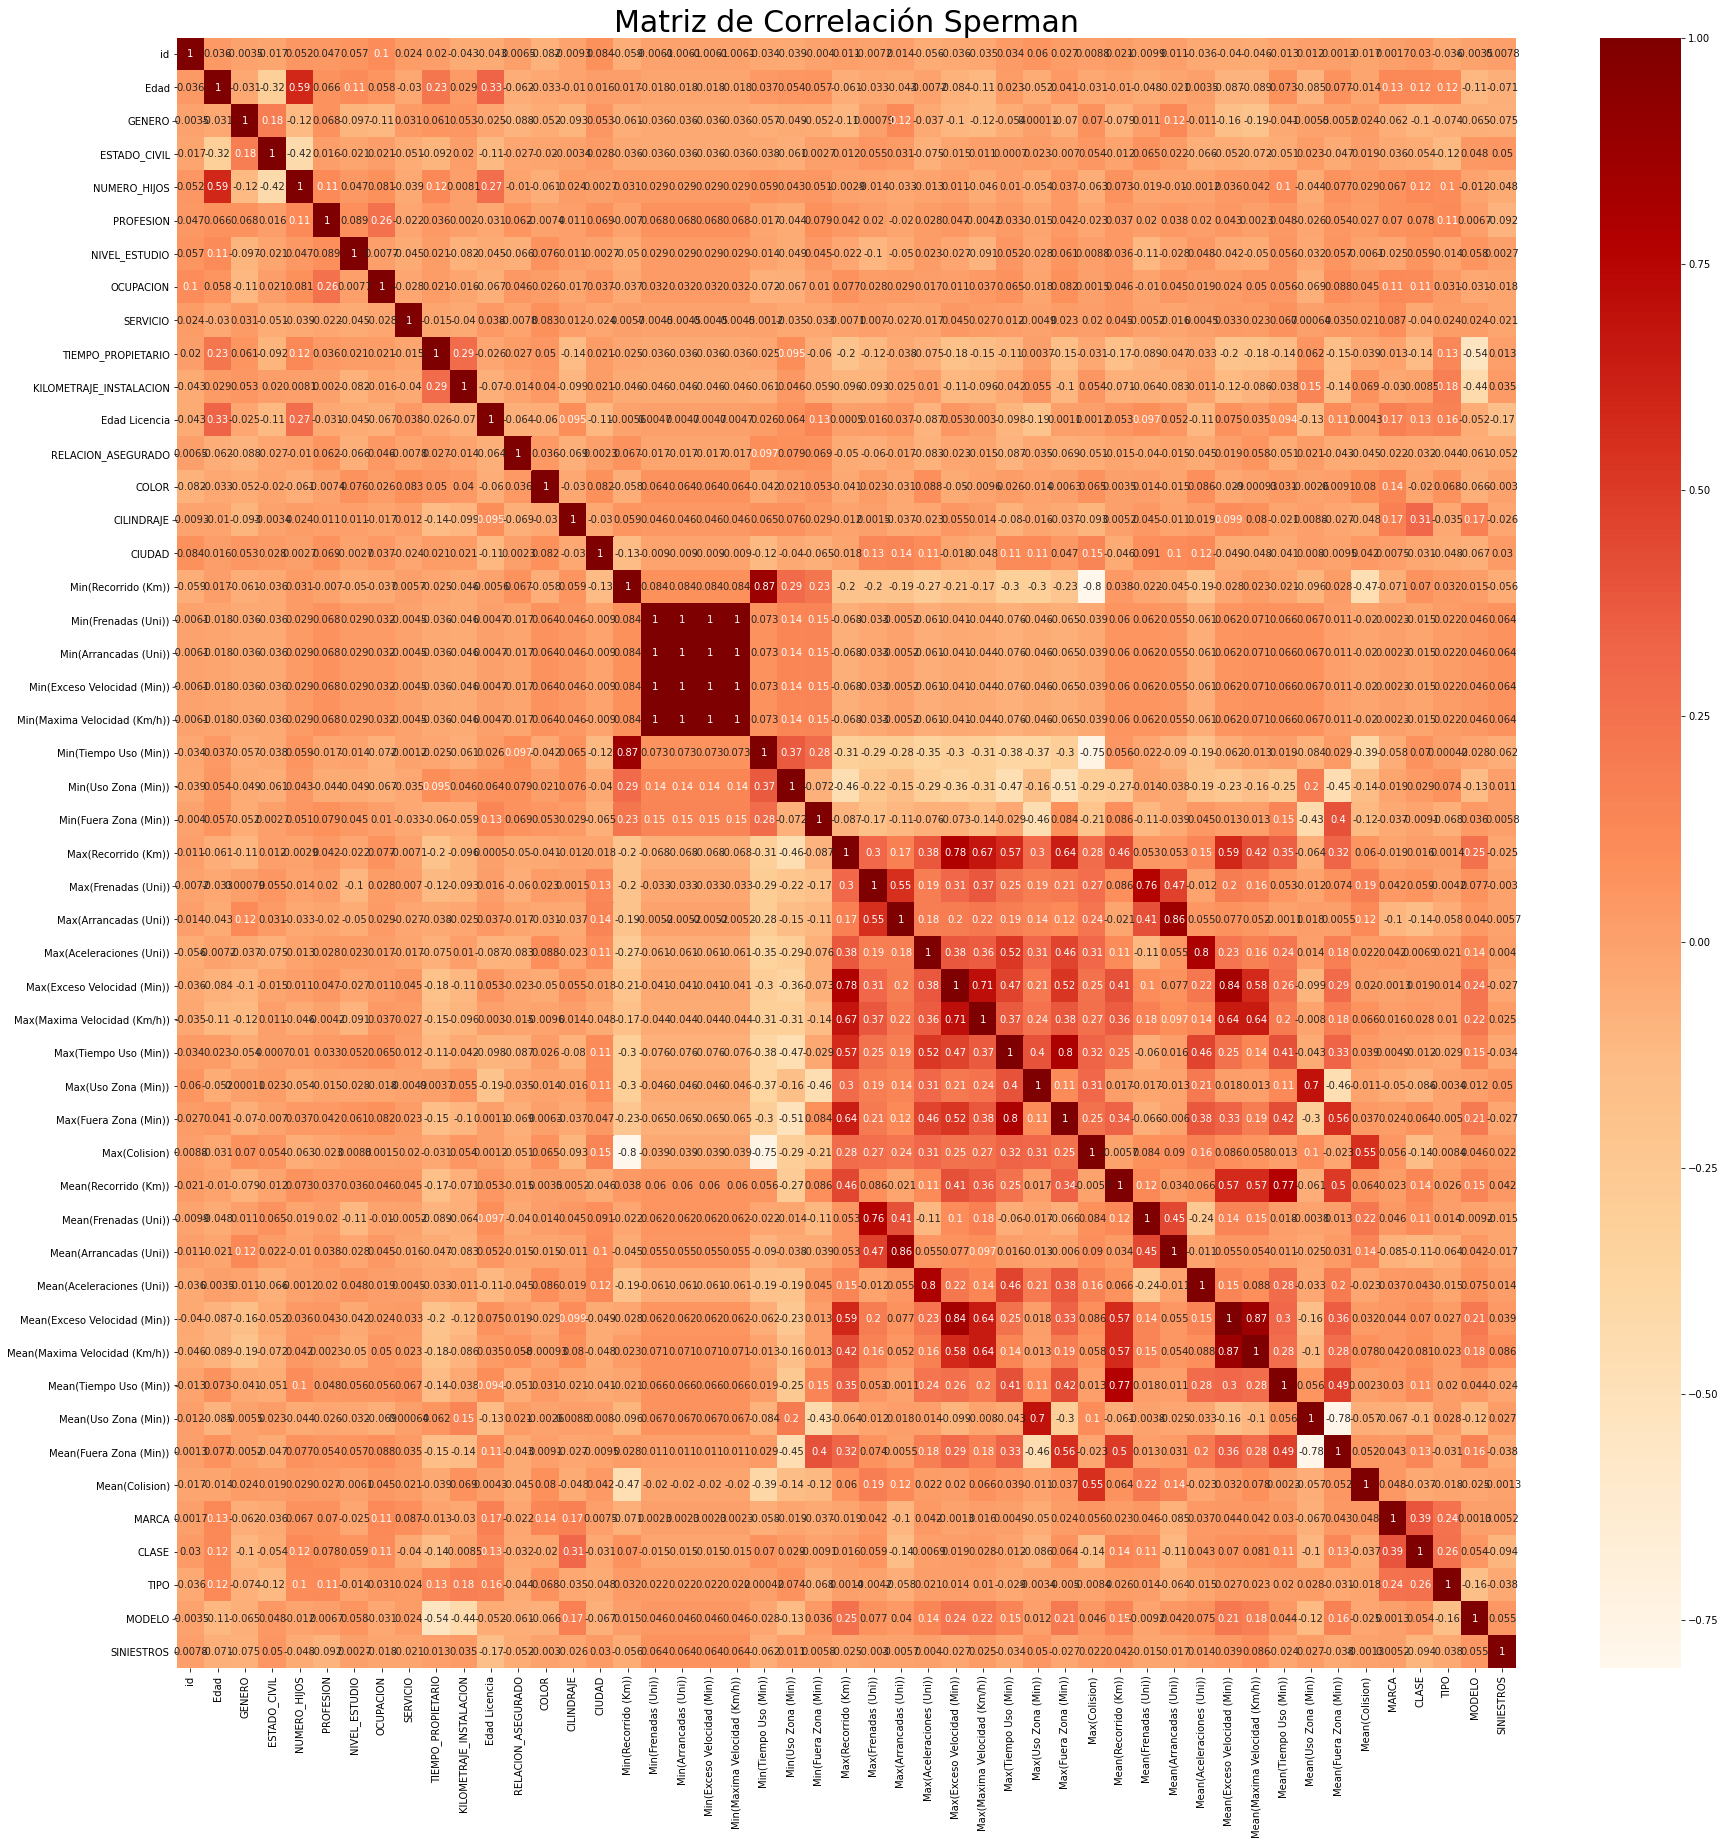

In [30]:
# Matriz de Correlación Sperman

plt.figure(figsize=(30,30)) 
sns.heatmap(correlation_matrix_spearman, annot = True,cmap='OrRd') # Link para los colores https://matplotlib.org/tutorials/colors/colormaps.html
plt.title("Matriz de Correlación Sperman",fontdict= {'fontsize':30})
# Exporta la matriz de Correlacion
#plt.savefig("/content/drive/My Drive/9° Semestre/Colab Notebooks-UPTC/Taller-Primer-50-Electiva4/correlationMatriz-Sperman.png")
# Visualizar la matriz de Correlacion
plt.show()

# **AJUSTES SEGUN MATRIZ DE CORRELACIÓN**

## ***Eliminar Atributos(Columnas) en base a la matriz de correlación***

In [31]:
dataSet.NUMERO_HIJOS = dataSet.NUMERO_HIJOS.astype(int)
dataSet.CILINDRAJE = dataSet.CILINDRAJE.astype(int)
dataSet['KILOMETRAJE_INSTALACION'] = dataSet.KILOMETRAJE_INSTALACION.round(2)
dataSet.MODELO = dataSet.MODELO.astype(int)
dataSet.Edad = dataSet.Edad.astype(int)
dataSet['Edad Licencia'] = dataSet['Edad Licencia'].astype(int)
dataSet['Min(Maxima Velocidad (Km/h))'] = dataSet['Min(Maxima Velocidad (Km/h))'].astype(int)
dataSet = dataSet.drop(dataSet[dataSet['Min(Maxima Velocidad (Km/h))'] == 94].index)

In [32]:
dataSet.SINIESTROS.value_counts()

0    441
1    119
2     33
Name: SINIESTROS, dtype: int64

## ***Agrupar los valores de `SINIESTRO` con `valor 1` para quienes han tenido siniestro y `valor 0` quienes NO***

In [33]:
dictionary_replacement = {0:0,
                          1:1,
                          2:1}

dataSet.SINIESTROS = dataSet.SINIESTROS.map(dictionary_replacement)


**Eliminar los atributos(Columnas) `Min` y `Max` de**


*   Recorrido (Km)
*   Frenadas (Uni)
* 	Arrancadas (Uni)
*   Exceso Velocidad (Min)
*   Maxima Velocidad (Km/h)
*   Tiempo Uso (Min)
*   Uso Zona (Min)
*   Fuera Zona (Min)

**y dejar solo los atributos `Men`** 



In [34]:
dataSet = dataSet.drop(dataSet.columns[range(16,34)], axis=1)
dataSet

,id,Edad,GENERO,ESTADO_CIVIL,NUMERO_HIJOS,PROFESION,NIVEL_ESTUDIO,OCUPACION,SERVICIO,TIEMPO_PROPIETARIO,KILOMETRAJE_INSTALACION,Edad Licencia,RELACION_ASEGURADO,COLOR,CILINDRAJE,CIUDAD,Mean(Recorrido (Km)),Mean(Frenadas (Uni)),Mean(Arrancadas (Uni)),Mean(Aceleraciones (Uni)),Mean(Exceso Velocidad (Min)),Mean(Maxima Velocidad (Km/h)),Mean(Tiempo Uso (Min)),Mean(Uso Zona (Min)),Mean(Fuera Zona (Min)),Mean(Colision),MARCA,CLASE,TIPO,MODELO,SINIESTROS
0,43665400,72,0,0,4,0,0,0,0,5,0.0,55,0,0,2300,0,3.00,0.20,0.60,0.00,0.00,0.00,21.20,21.20,0.00,0.00,0,0,0,1987,0
1,60342217,35,0,0,0,1,1,1,0,7,0.0,9,0,1,1300,0,9.36,0.08,0.00,1.08,0.02,1.94,28.09,0.00,28.09,0.00,1,0,1,1992,0
2,16205257,81,1,0,3,2,0,0,0,10,0.0,61,0,2,1931,0,4.80,0.40,0.02,0.59,0.00,0.00,21.01,7.66,13.36,0.00,0,0,2,1998,0
3,42188664,38,1,1,0,3,2,2,1,5,0.0,11,1,3,2500,0,7.53,0.17,0.01,0.00,0.20,9.17,22.65,21.31,1.34,0.01,2,0,3,2003,0
4,93966068,70,0,0,0,4,0,3,0,6,0.0,37,0,1,2000,0,5.96,2.71,0.00,1.03,0.13,1.75,22.62,7.47,15.15,0.00,3,0,4,2003,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,86038652,56,1,0,2,0,0,10,0,4,79.2,13,0,1,1200,0,6.96,0.28,0.01,1.91,0.13,4.71,22.56,19.59,2.97,0.01,1,0,23,2006,1
598,80355353,48,1,2,0,0,0,0,0,9,79.2,25,0,0,2000,0,7.16,0.03,0.00,0.00,0.03,3.94,17.90,14.31,3.59,0.00,3,0,29,1999,1
599,43184833,46,1,2,1,17,0,6,0,2,79.2,7,0,1,1300,0,6.01,0.25,0.00,0.04,0.00,0.00,23.04,22.91,0.13,0.00,3,0,71,2002,0
600,80786094,53,1,1,4,18,2,2,0,2,79.2,25,0,0,2500,0,2.61,0.04,0.01,0.00,0.00,0.00,11.97,0.05,11.92,0.01,1,0,33,2007,1


In [35]:
dataSet.dtypes

id                                 int64
Edad                               int64
GENERO                             int64
ESTADO_CIVIL                       int64
NUMERO_HIJOS                       int64
PROFESION                          int64
NIVEL_ESTUDIO                      int64
OCUPACION                          int64
SERVICIO                           int64
TIEMPO_PROPIETARIO                 int64
KILOMETRAJE_INSTALACION          float64
Edad Licencia                      int64
RELACION_ASEGURADO                 int64
COLOR                              int64
CILINDRAJE                         int64
CIUDAD                             int64
Mean(Recorrido (Km))             float64
Mean(Frenadas (Uni))             float64
Mean(Arrancadas (Uni))           float64
Mean(Aceleraciones (Uni))        float64
Mean(Exceso Velocidad (Min))     float64
Mean(Maxima Velocidad (Km/h))    float64
Mean(Tiempo Uso (Min))           float64
Mean(Uso Zona (Min))             float64
Mean(Fuera Zona 

# **NORMALIZACIÓN DE LOS DATOS**

In [36]:
dataset_norm = (dataSet-dataSet.min())/(dataSet.max()-dataSet.min())
dataset_norm

,id,Edad,GENERO,ESTADO_CIVIL,NUMERO_HIJOS,PROFESION,NIVEL_ESTUDIO,OCUPACION,SERVICIO,TIEMPO_PROPIETARIO,KILOMETRAJE_INSTALACION,Edad Licencia,RELACION_ASEGURADO,COLOR,CILINDRAJE,CIUDAD,Mean(Recorrido (Km)),Mean(Frenadas (Uni)),Mean(Arrancadas (Uni)),Mean(Aceleraciones (Uni)),Mean(Exceso Velocidad (Min)),Mean(Maxima Velocidad (Km/h)),Mean(Tiempo Uso (Min)),Mean(Uso Zona (Min)),Mean(Fuera Zona (Min)),Mean(Colision),MARCA,CLASE,TIPO,MODELO,SINIESTROS
0,0.433810,0.823529,0.0,0.00,0.500,0.000000,0.00,0.000000,0.0,0.263158,0.000000,0.733333,0.000,0.000000,0.295455,0.0,0.066634,0.001485,0.048820,0.000000,0.000000,0.000000,0.270682,0.399623,0.000000,0.000000,0.000000,0.0,0.000000,0.206897,0.0
1,0.601579,0.388235,0.0,0.00,0.000,0.043478,0.25,0.058824,0.0,0.368421,0.000000,0.120000,0.000,0.090909,0.068182,0.0,0.378246,0.000594,0.000000,0.124567,0.002924,0.034637,0.402021,0.000000,0.472418,0.000000,0.045455,0.0,0.009524,0.379310,0.0
2,0.157561,0.929412,1.0,0.00,0.375,0.086957,0.00,0.000000,0.0,0.526316,0.000000,0.813333,0.000,0.181818,0.211591,0.0,0.154826,0.002969,0.001627,0.068051,0.000000,0.000000,0.267061,0.144392,0.224689,0.000000,0.000000,0.0,0.019048,0.586207,0.0
3,0.418954,0.423529,1.0,0.25,0.000,0.130435,0.50,0.117647,1.0,0.263158,0.000000,0.146667,0.125,0.272727,0.340909,0.0,0.288584,0.001262,0.000814,0.000000,0.029240,0.163721,0.298323,0.401697,0.022536,0.018182,0.090909,0.0,0.028571,0.758621,0.0
4,0.939835,0.800000,0.0,0.00,0.000,0.173913,0.00,0.176471,0.0,0.315789,0.000000,0.493333,0.000,0.090909,0.227273,0.0,0.211661,0.020117,0.000000,0.118800,0.019006,0.031244,0.297751,0.140811,0.254793,0.000000,0.136364,0.0,0.038095,0.758621,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,0.860085,0.635294,1.0,0.00,0.250,0.000000,0.00,0.588235,0.0,0.210526,0.084797,0.173333,0.000,0.090909,0.045455,0.0,0.260657,0.002079,0.000814,0.220300,0.019006,0.084092,0.296607,0.369274,0.049950,0.018182,0.045455,0.0,0.219048,0.862069,1.0
598,0.802911,0.541176,1.0,0.50,0.000,0.000000,0.00,0.000000,0.0,0.473684,0.084797,0.333333,0.000,0.000000,0.227273,0.0,0.270456,0.000223,0.000000,0.000000,0.004386,0.070345,0.207777,0.269746,0.060377,0.000000,0.136364,0.0,0.276190,0.620690,1.0
599,0.428975,0.517647,1.0,0.50,0.125,0.739130,0.00,0.352941,0.0,0.105263,0.084797,0.093333,0.000,0.090909,0.068182,0.0,0.214111,0.001856,0.000000,0.004614,0.000000,0.000000,0.305757,0.431857,0.002186,0.000000,0.136364,0.0,0.676190,0.724138,0.0
600,0.807245,0.600000,1.0,0.25,0.500,0.782609,0.50,0.117647,0.0,0.105263,0.084797,0.333333,0.000,0.000000,0.340909,0.0,0.047526,0.000297,0.000814,0.000000,0.000000,0.000000,0.094739,0.000943,0.200471,0.018182,0.045455,0.0,0.314286,0.896552,1.0


# ***Hallar el valor óptimo de Clustering***

## ***Método del Codo***

In [37]:
inercia = []
for i in range(1, 11):
  algorithm = KMeans(n_clusters=i,max_iter=300)
  algorithm.fit(dataset_norm)
  inercia.append(algorithm.inertia_)

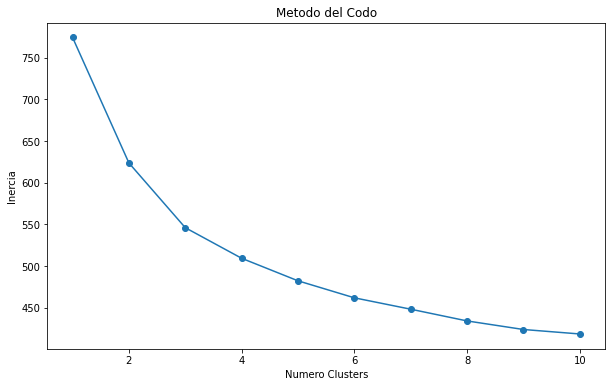

In [38]:
plt.figure(figsize=[10,6])
plt.title('Metodo del Codo')
plt.xlabel('Numero Clusters')
plt.ylabel('Inercia')
plt.plot(list(range(1,11)),inercia, marker='o')
plt.show()

## ***Método de la Silueta***


In [39]:
from sklearn.metrics import silhouette_score

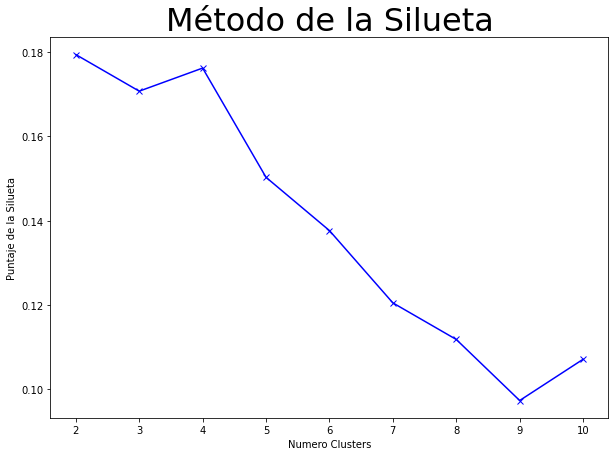

In [40]:
silueta = []
K = range(2,11)
for i in K:
  kmeans= KMeans(n_clusters=i).fit(dataset_norm)
  labels = kmeans.labels_
  silueta.append(silhouette_score(dataset_norm,labels,metric='manhattan'))

plt.figure(figsize=[10,7])
plt.title('Método de la Silueta',{'fontsize': 32})
plt.xlabel('Numero Clusters')
plt.ylabel('Puntaje de la Silueta')
plt.plot(K,silueta, 'bx-')

# **Nuevo Analisis de Matriz de Correlación**

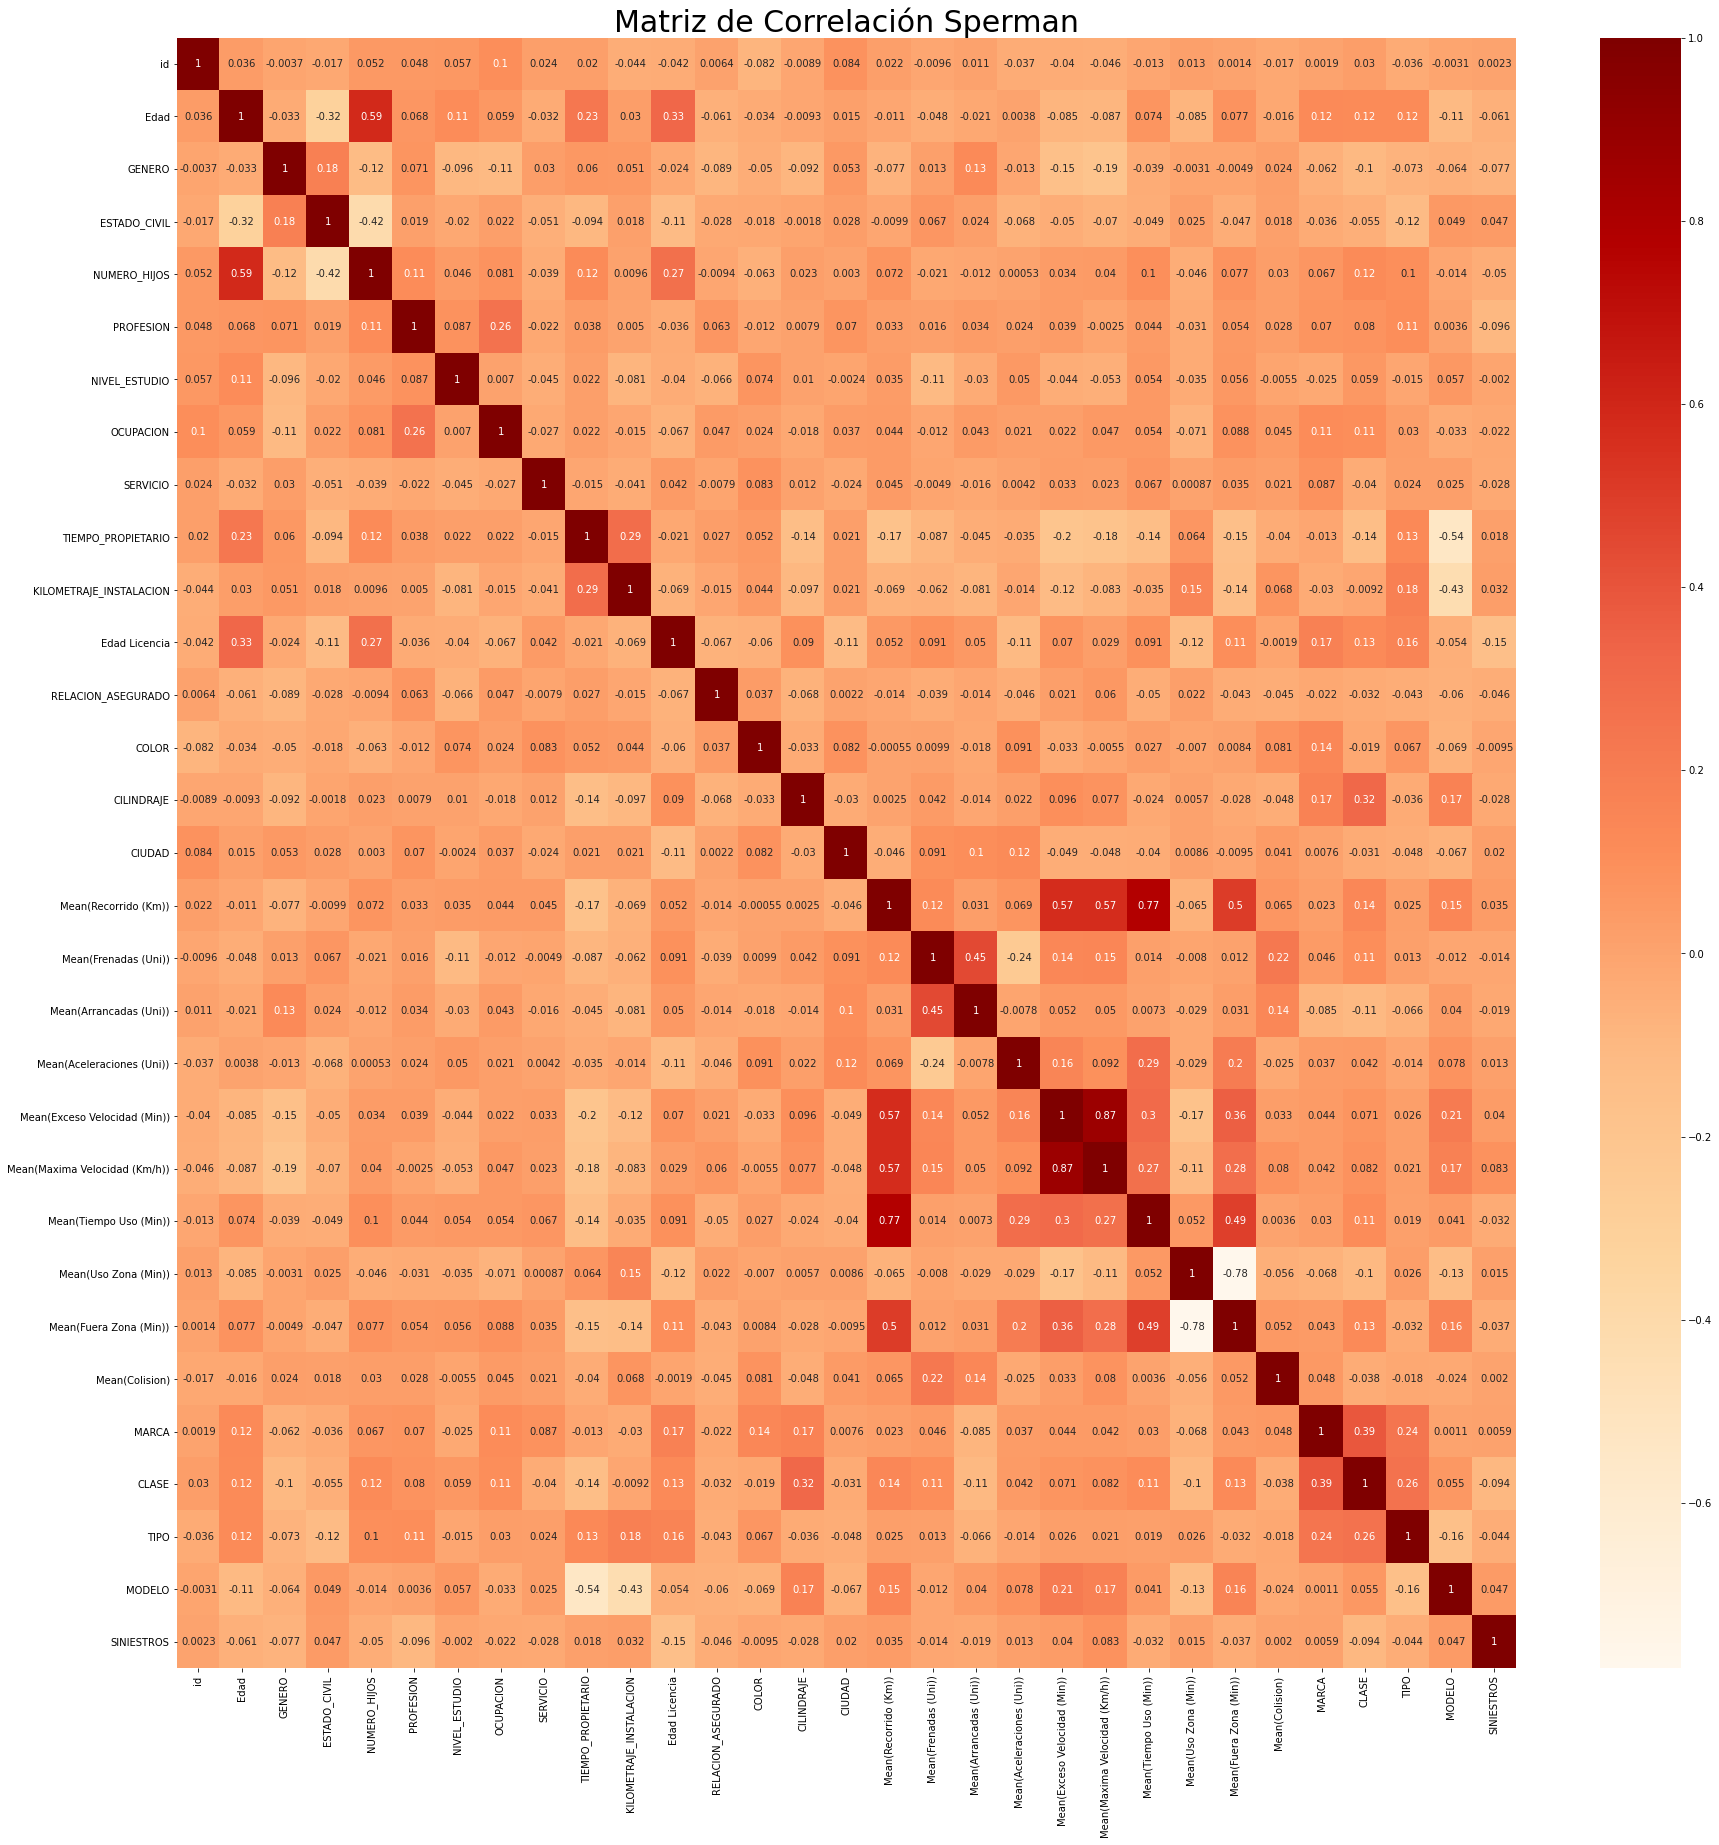

In [41]:
# Hallar la matriz de Correlación
correlation_matrix_spearman = dataSet.corr(method= "spearman")
# Matriz de Correlación Sperman

plt.figure(figsize=(30,30)) 
sns.heatmap(correlation_matrix_spearman, annot = True,cmap='OrRd') # Link para los colores https://matplotlib.org/tutorials/colors/colormaps.html
plt.title("Matriz de Correlación Sperman",fontdict= {'fontsize':30})
# Exporta la matriz de Correlacion
#plt.savefig("/content/drive/My Drive/9° Semestre/Colab Notebooks-UPTC/Taller-Primer-50-Electiva4/correlationMatriz-Sperman.png")
# Visualizar la matriz de Correlacion
plt.show()

In [42]:
dataSet = dataSet.drop(columns=['id','OCUPACION','PROFESION','SERVICIO','NIVEL_ESTUDIO','KILOMETRAJE_INSTALACION','RELACION_ASEGURADO','COLOR','CILINDRAJE','CIUDAD'])
dataset_norm = dataset_norm.drop(columns=['id','OCUPACION','PROFESION','SERVICIO','NIVEL_ESTUDIO','KILOMETRAJE_INSTALACION','RELACION_ASEGURADO','COLOR','CILINDRAJE','CIUDAD'])

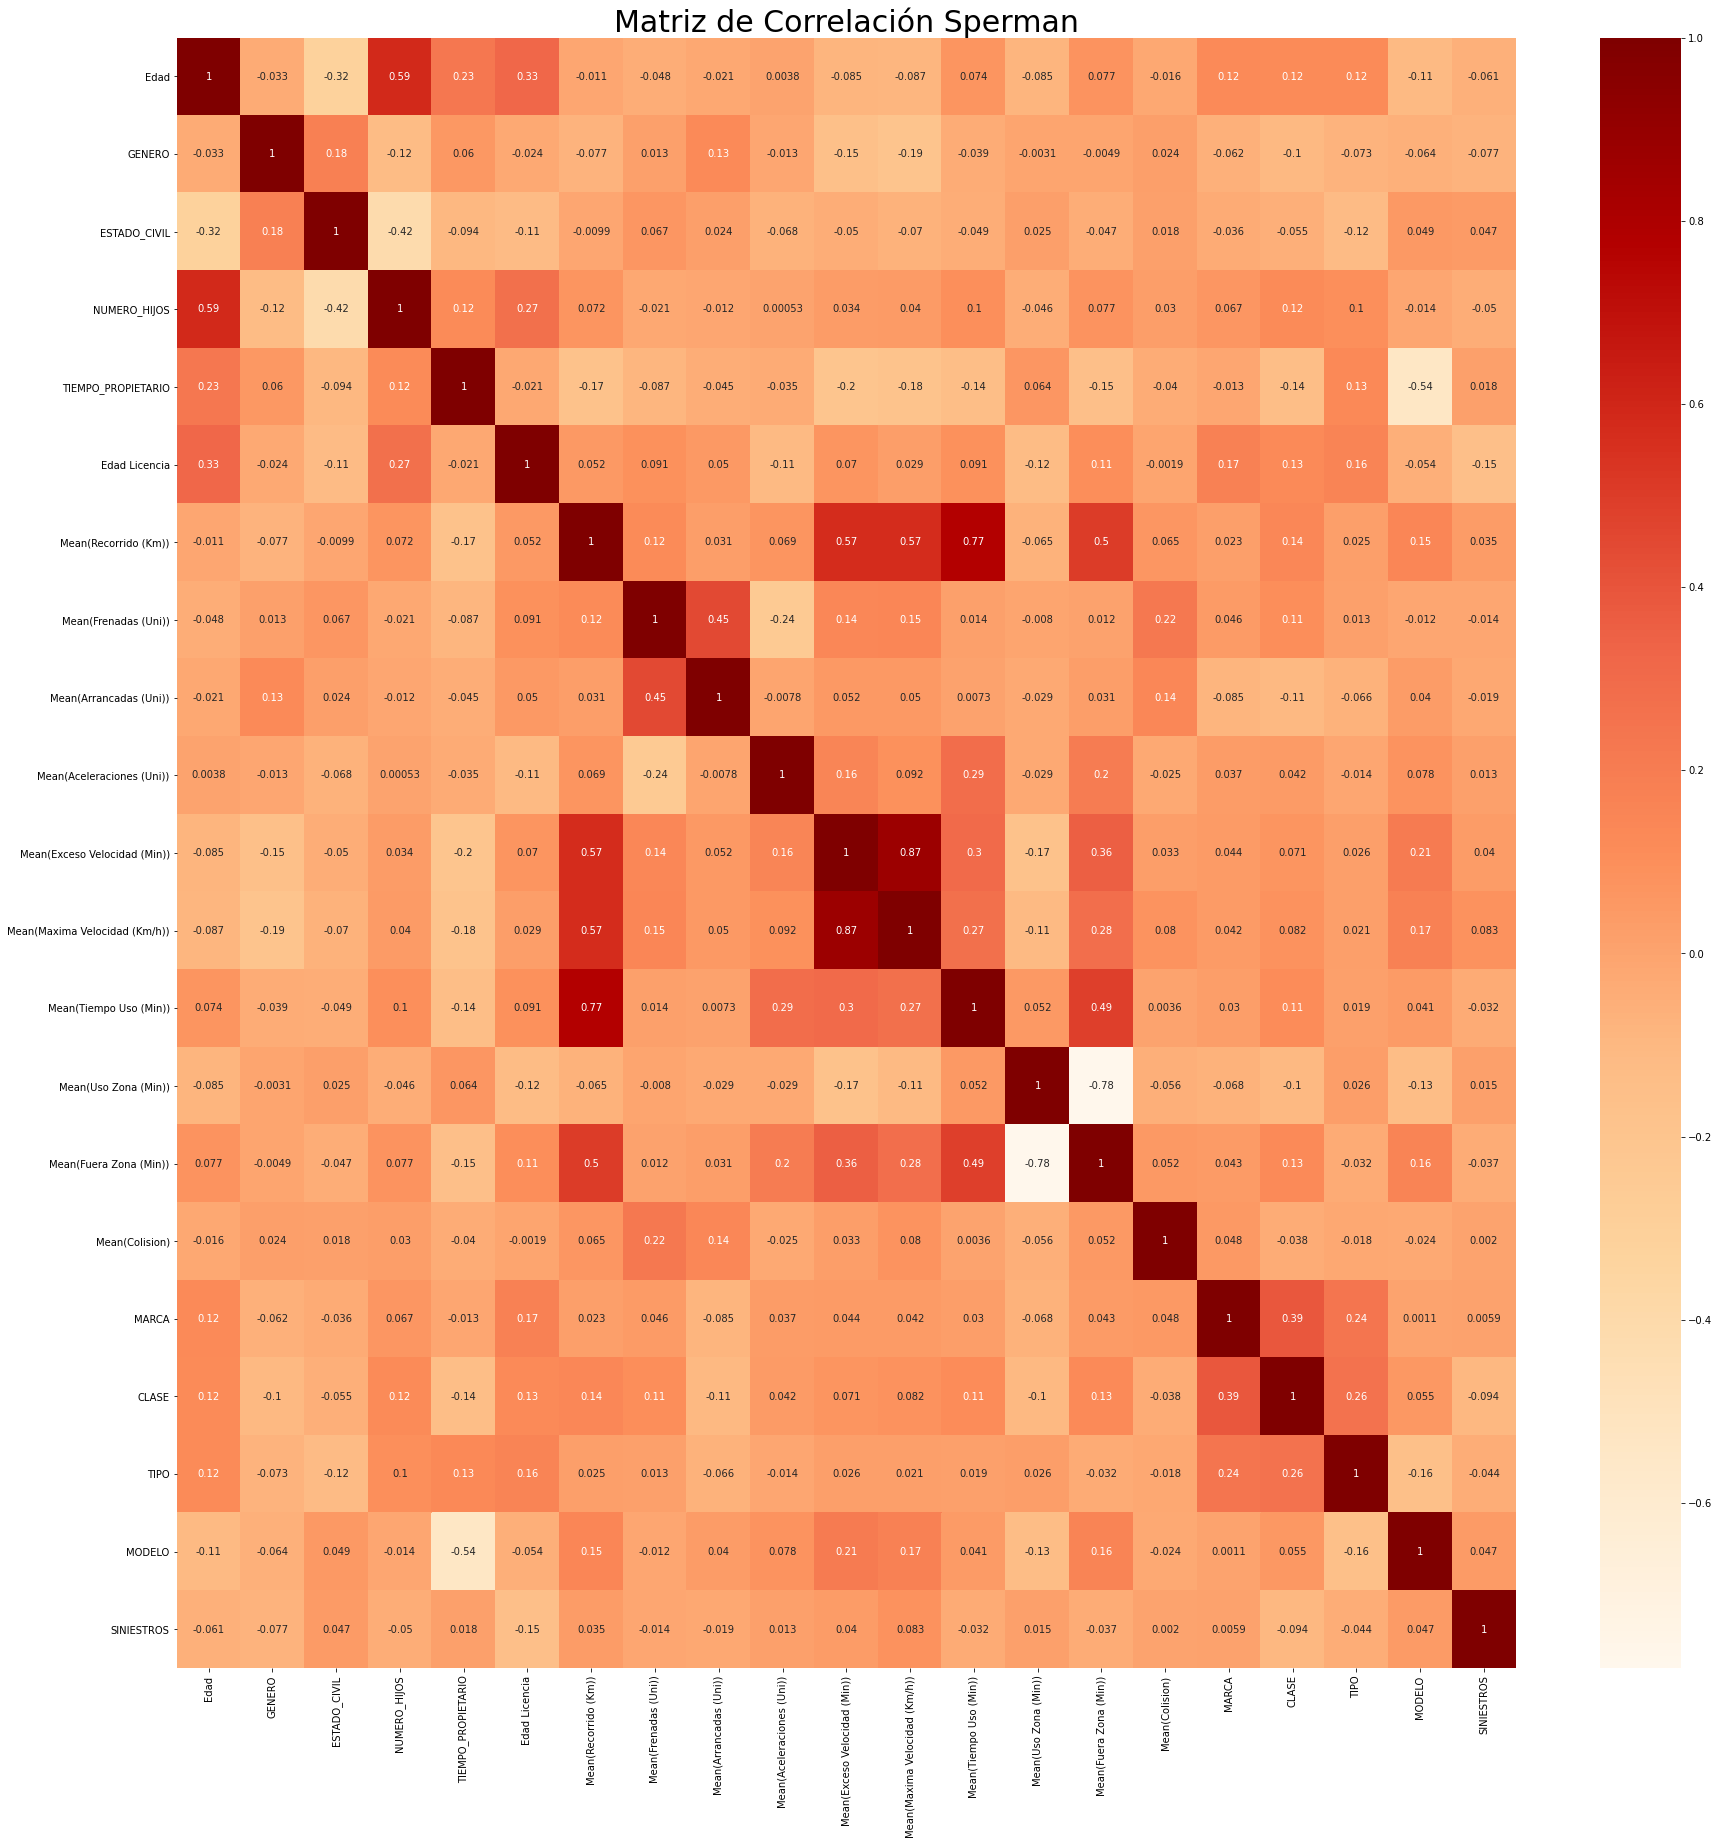

In [43]:
# Hallar la matriz de Correlación
correlation_matrix_spearman = dataSet.corr(method= "spearman")
# Matriz de Correlación Sperman

plt.figure(figsize=(30,30)) 
sns.heatmap(correlation_matrix_spearman, annot = True,cmap='OrRd') # Link para los colores https://matplotlib.org/tutorials/colors/colormaps.html
plt.title("Matriz de Correlación Sperman",fontdict= {'fontsize':30})
# Exporta la matriz de Correlacion
#plt.savefig("/content/drive/My Drive/9° Semestre/Colab Notebooks-UPTC/Taller-Primer-50-Electiva4/correlationMatriz-Sperman.png")
# Visualizar la matriz de Correlacion
plt.show()

# ***Clustering K-Means***

In [44]:
clusteringKMeans = KMeans(n_clusters=4,max_iter=300)
clusteringKMeans.fit(dataset_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [45]:
dataSet['Cluster_Kmeans'] = clusteringKMeans.labels_
labels = clusteringKMeans.labels_
labels

array([0, 0, 1, 1, 0, 3, 0, 1, 3, 1, 0, 0, 0, 0, 0, 0, 2, 1, 3, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 2, 1, 2, 0, 0, 3, 3, 0, 0, 3, 1, 0,
       1, 2, 3, 1, 0, 1, 1, 0, 0, 1, 3, 0, 3, 1, 1, 0, 0, 3, 3, 3, 1, 1,
       0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 3, 0, 0, 0, 0, 3, 0, 1, 1, 0, 0, 3,
       1, 1, 0, 0, 2, 3, 0, 0, 1, 2, 3, 0, 0, 3, 1, 0, 0, 0, 0, 3, 0, 3,
       0, 1, 0, 3, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 3, 1, 3, 0, 3, 0, 1, 1,
       0, 1, 0, 1, 3, 1, 0, 3, 0, 1, 1, 1, 0, 3, 0, 0, 0, 2, 0, 1, 0, 0,
       1, 0, 1, 1, 3, 0, 1, 0, 0, 3, 0, 0, 0, 1, 3, 2, 2, 3, 1, 2, 0, 1,
       0, 1, 1, 3, 2, 0, 3, 0, 1, 0, 2, 3, 0, 1, 1, 0, 0, 0, 3, 0, 0, 0,
       1, 2, 1, 1, 1, 0, 2, 1, 3, 1, 0, 0, 0, 1, 1, 0, 3, 1, 1, 3, 0, 1,
       2, 0, 3, 3, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 3, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 3, 1, 0, 2,
       0, 0, 3, 0, 0, 0, 0, 0, 3, 1, 3, 1, 1, 0, 1, 0, 1, 1, 1, 3, 3, 1,
       2, 3, 1, 2, 0, 0, 3, 2, 3, 3, 1, 3, 0, 3, 1,

# **Agrupamiento Jerárquico - Hierarchical clustering**

In [46]:
from sklearn.cluster import AgglomerativeClustering

In [47]:
clusteringHierarchical = AgglomerativeClustering(n_clusters=4).fit(dataset_norm)
clusteringHierarchical

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=4)

In [48]:
dataSet['Cluster_HierarchicalClustering'] = clusteringHierarchical.labels_
labels = clusteringHierarchical.labels_
labels

array([0, 0, 1, 1, 0, 2, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 3, 1, 2, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 3, 1, 3, 0, 0, 2, 2, 0, 0, 2, 1, 0,
       1, 3, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 2, 2, 2, 1, 1,
       0, 0, 1, 1, 3, 3, 0, 0, 0, 1, 2, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 2,
       1, 1, 0, 0, 3, 2, 0, 0, 1, 3, 2, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 2,
       0, 1, 0, 2, 1, 1, 1, 1, 1, 3, 0, 0, 0, 0, 2, 1, 2, 0, 2, 0, 1, 1,
       0, 1, 0, 1, 2, 1, 0, 2, 0, 1, 1, 1, 0, 2, 0, 0, 0, 3, 0, 1, 0, 0,
       1, 0, 1, 1, 2, 0, 1, 0, 0, 2, 0, 0, 0, 1, 2, 3, 3, 2, 1, 3, 0, 1,
       0, 1, 1, 2, 3, 0, 2, 0, 1, 0, 3, 2, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0,
       1, 3, 1, 1, 1, 0, 3, 1, 2, 1, 0, 0, 0, 1, 1, 0, 2, 1, 1, 2, 0, 1,
       3, 0, 2, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 2, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 2, 1, 0, 3,
       0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 2, 2, 1,
       3, 2, 1, 3, 0, 0, 2, 3, 2, 2, 1, 2, 0, 2, 1,

## ***Hierarchy Dendrogram(Dendrograma de jerarquía)***

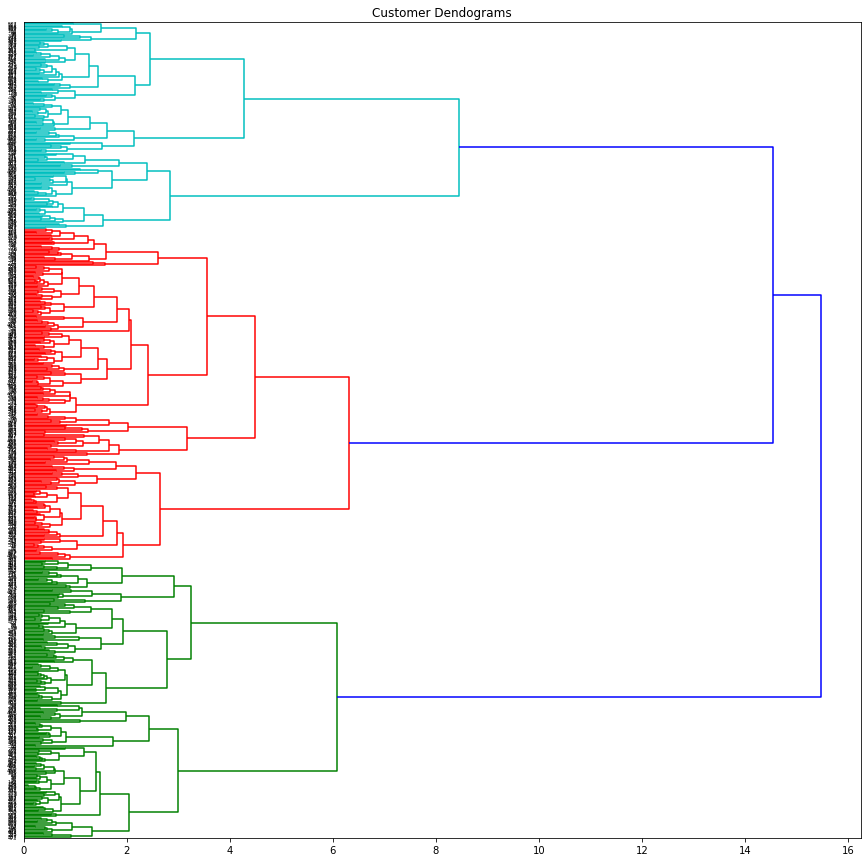

In [49]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(15, 15))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(dataset_norm, method='ward'),orientation='right')

# **Clustering DBSCAN**

In [50]:
from sklearn.cluster import DBSCAN

In [51]:
epsilon = 0.9
minimumSamples = 10
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(dataset_norm)
dataSet['Cluster_DBSCAN'] = db.labels_
labels = db.labels_
labels

array([ 0,  0,  1,  1,  0,  2,  0,  1,  2,  1, -1,  0,  0,  0,  0,  0,  3,
        1,  2,  1,  1,  0,  1,  0,  1,  0,  0,  1,  1,  1,  0,  0,  3,  1,
        3,  0,  0,  2,  2,  0,  0,  2,  1, -1,  1,  3,  2,  1,  0,  1,  1,
        0,  0,  1,  2,  0,  2,  1,  1,  0,  0,  2,  2,  2,  1,  1,  0,  0,
        1,  1,  3,  3,  0,  0,  0,  1,  2,  0,  0,  0,  0,  2,  0,  1,  1,
        0,  0,  2,  1,  1,  0,  0,  3,  2,  0,  0,  1, -1,  2,  0,  0,  2,
        1,  0,  0,  0,  0,  2,  0,  2,  0,  1,  0,  2,  1,  1,  1,  1,  1,
        3,  0,  0,  0,  0,  2,  1,  2,  0,  2,  0,  1,  1,  0,  1,  0,  1,
        2,  1,  0,  2,  0,  1,  1,  1,  0,  2,  0,  0,  0,  3,  0,  1,  0,
        0,  1,  0,  1,  1,  2,  0,  1,  0,  0,  2,  0,  0,  0,  1,  2,  3,
        3,  2,  1,  3,  0,  1,  0,  1,  1,  2,  3,  0,  2,  0,  1,  0,  3,
        2,  0,  1,  1,  0,  0,  0,  2,  0,  0,  0,  1,  3,  1,  1,  1,  0,
        3,  1,  2,  1,  0,  0,  0,  1,  1,  0,  2,  1,  1,  2,  0,  1,  3,
        0,  2,  2,  0, -1

In [52]:
# Primer, crear un vector de valores booleanos (valores binarios (verdadero/falso)) usando las etiquetas de la variable db.
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True,  True,

In [53]:
# Número de clusters en etiquetas, ignorando el ruido en caso de estar presente.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

4

In [54]:
unique_labels = set(labels)
unique_labels

{-1, 0, 1, 2, 3}

# **Exportar archivo FINAL**

In [55]:
dataSet.head(10)

,Edad,GENERO,ESTADO_CIVIL,NUMERO_HIJOS,TIEMPO_PROPIETARIO,Edad Licencia,Mean(Recorrido (Km)),Mean(Frenadas (Uni)),Mean(Arrancadas (Uni)),Mean(Aceleraciones (Uni)),Mean(Exceso Velocidad (Min)),Mean(Maxima Velocidad (Km/h)),Mean(Tiempo Uso (Min)),Mean(Uso Zona (Min)),Mean(Fuera Zona (Min)),Mean(Colision),MARCA,CLASE,TIPO,MODELO,SINIESTROS,Cluster_Kmeans,Cluster_HierarchicalClustering,Cluster_DBSCAN
0,72,0,0,4,5,55,3.00,0.20,0.60,0.00,0.00,0.00,21.20,21.20,0.00,0.00,0,0,0,1987,0,0,0,0
1,35,0,0,0,7,9,9.36,0.08,0.00,1.08,0.02,1.94,28.09,0.00,28.09,0.00,1,0,1,1992,0,0,0,0
2,81,1,0,3,10,61,4.80,0.40,0.02,0.59,0.00,0.00,21.01,7.66,13.36,0.00,0,0,2,1998,0,1,1,1
3,38,1,1,0,5,11,7.53,0.17,0.01,0.00,0.20,9.17,22.65,21.31,1.34,0.01,2,0,3,2003,0,1,1,1
4,70,0,0,0,6,37,5.96,2.71,0.00,1.03,0.13,1.75,22.62,7.47,15.15,0.00,3,0,4,2003,0,0,0,0
5,40,0,0,1,4,10,9.62,0.12,0.03,0.00,0.09,7.76,26.65,22.89,3.77,0.00,4,0,5,2005,1,3,2,2
6,45,0,0,3,2,24,13.15,0.15,0.00,2.22,0.98,19.97,27.24,15.39,11.85,0.00,5,1,6,2004,0,0,0,0
7,54,1,0,2,3,33,7.09,0.35,0.02,1.49,0.28,3.84,23.51,2.04,21.48,0.00,4,0,5,2005,0,1,1,1
8,57,0,0,2,1,14,6.18,0.00,0.09,1.55,0.00,0.00,26.45,0.00,26.45,0.00,4,0,5,2005,1,3,2,2
9,53,1,0,2,3,13,13.13,0.09,0.03,1.25,0.87,8.68,29.93,1.96,27.97,0.00,1,0,7,2006,0,1,1,1


In [56]:
dataSet.to_csv('DataSet-Resultado-Agrupamiento.csv', index=False)
files.download('DataSet-Resultado-Agrupamiento.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>